# Тематическое моделирование

-- способ построения модели коллекции текстовых документов, которая определяет, к каким темам относится каждый из документов.

## Задача
1. Провести тематическое моделирование (LSA, NMF и LDA) коллекции текстов с помощью sklearn.
2. Проинтерпретировать получившиеся темы.
3. Рассмотреть распределение категорий вакансий по темам.
4. Найти в [gensim](https://radimrehurek.com/gensim/) аналоги использованных методов. Сравнить результаты работы с sklearn.
5. \* Доп.: использовать [bigARTM](https://github.com/bigartm/bigartm), сравнить результаты с предыдущими. (В colab можно установить через [TopicNet](https://github.com/machine-intelligence-laboratory/TopicNet#google-colab--kaggle-notebooks))

## Инструменты
sklearn, gensim, bigARTM

## LSA

В качестве исходной информации ЛСА использует матрицу термы-на-документы, описывающую набор данных, используемый для обучения системы. Элементы этой матрицы содержат, как правило, веса, учитывающие частоты использования каждого терма в каждом документе и участие терма во всех документах (TF-IDF). Наиболее распространенный вариант ЛСА основан на использовании разложения матрицы по сингулярным значениям (SVD — Singular Value Decomposition). С помощью SVD-разложения любая матрица раскладывается во множество ортогональных матриц, линейная комбинация которых является достаточно точным приближением к исходной матрице.

Для проведения SVD можно использовать [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

![](https://miro.medium.com/max/728/0*Oyg8ghJPpTToHUDF.png)

## Non-negative Matrix Factorization

Ещё один способ извлечения тем.
Для проведения NMF можно использовать [sklearn.decomposition.NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF)

![](https://miro.medium.com/max/875/0*safL-jAcu8Q0i1AA.png)

## LDA

LDA принадлежит семейству порождающий вероятностных моделей, в которых темы представлены вероятностями появления каждого слова из заданного набора. Документы в свою очередь могут быть представлены как сочетания тем. Уникальная особенность моделей LDA состоит в том что темы не обязательно должны быть различными и слова могут встречаться в нескольких темах; это придает некоторую нечеткость определяемым темам, что может пригодиться для совладения с гибкостью языка.

Для проведения тематического моделирования с помощью LDA можно использовать [sklearn.decomposition.LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

## Доп материалы:
* https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
* https://ai.plainenglish.io/fast-nlp101-15c924535182

## 1. Провести тематическое моделирование (NMF, LSA и LDA) коллекции текстов с помощью sklearn.

### Подготовка

In [1]:
import pickle
path = '../models/'
def load_vectorizer(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

tfidf_vectorizer = load_vectorizer(path + 'tfidf_vectorizer_2.pkl')
tfidf_vectorizer

In [2]:
import scipy

doc_term_matrix = scipy.sparse.load_npz('../data/tfidf_vectorizer_matrix_2.npz')
doc_term_matrix.shape

(37780, 96516)

In [3]:
import numpy as np
import random

seed = 39
np.random.seed(seed)
random.seed(seed)

N_COMPONENTS = 25
N_ITER = 40

### LSA (aka SVD)

In [4]:
%%time
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=N_COMPONENTS, n_iter=N_ITER, random_state=seed)
svd.fit(doc_term_matrix)

Wall time: 1min 1s


TruncatedSVD(n_components=25, n_iter=40, random_state=39)

In [5]:
N_TOP_WORDS = 25
def print_most_popular_words_from_topics(n_top_words, components):
    print(f'Top {n_top_words} words for topics:')
    for i, topic in enumerate(components):
        print(f'Topic №{i + 1}:')
        print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-n_top_words:]])

print_most_popular_words_from_topics(N_TOP_WORDS, svd.components_)

Top 25 words for topics:
Topic №1:
['график работа', 'организация', 'обучение', 'тк', 'образование', 'год', 'ведение', 'заработный плата', 'заработный', 'плата', 'рф', 'график', 'высокий', 'оформление', 'контроль', 'обязанность', 'требование', 'условие', 'опыт работа', 'знание', 'клиент', 'компания', 'опыт', 'продажа', 'работа']
Topic №2:
['вакансия появляться', 'ваш опыт', 'связываться', 'указанный контакт', 'резюме сохранять', 'сохранять наш', 'наш база', 'соответствовать требование', 'работа пожелание', 'благодарить', 'требование возможность', 'ответ течение', 'пожелание соответствовать', 'сегодня подходящий', 'связываться указанный', 'проявлять наш', 'неделя', 'ваш резюме', 'наш', 'вакансия', 'рассмотрение', 'резюме', 'ваш', 'течение', 'течение неделя']
Topic №3:
['опыт', 'требование высокий', 'производственный', 'год', 'образование', 'подготовка', 'составление', 'бухгалтерский учет', 'расчет', 'проект', 'оборудование', 'предприятие', 'система', 'документ', 'производство', 'контрол

### NMF

In [6]:
%%time
from sklearn.decomposition import NMF

nmf = NMF(n_components=N_COMPONENTS, init='random', random_state=seed)
nmf.fit(doc_term_matrix)

Wall time: 1min 53s


NMF(init='random', n_components=25, random_state=39)

In [7]:
print_most_popular_words_from_topics(N_TOP_WORDS, nmf.components_)

Top 25 words for topics:
Topic №1:
['формирование', 'процесс', 'мероприятие', 'руководство', 'обеспечение', 'качество', 'кадровый', 'сотрудник', 'высокий', 'компания', 'отдел', 'подразделение', 'развитие', 'опыт', 'работа', 'управление персонал', 'деятельность', 'планирование', 'проведение', 'анализ', 'подбор', 'контроль', 'организация', 'управление', 'персонал']
Topic №2:
['трудовой', 'представление', 'юридический лицо', 'заключение', 'компания', 'арбитражный', 'интерес', 'лицо', 'гражданский', 'вопрос', 'сопровождение', 'право', 'государственный', 'деятельность', 'юридический образование', 'высокий юридический', 'орган', 'судебный', 'законодательство', 'подготовка', 'суд', 'договор', 'документ', 'правовой', 'юридический']
Topic №3:
['поставка', 'товар требование', 'ценность', 'размещение', 'проведение инвентаризация', 'учет', 'документ', 'продукция', 'прием товар', 'приемка', 'тмц', 'отгрузка', 'работа склад', 'товар склад', 'выкладка товар', 'выкладка', 'прием', 'заказ', 'хранение',

### LDA

In [8]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=N_COMPONENTS,
                                      learning_method='online',
                                      random_state = seed)

lda.fit(doc_term_matrix)

Wall time: 8min 14s


LatentDirichletAllocation(learning_method='online', n_components=25,
                          random_state=39)

In [11]:
print_most_popular_words_from_topics(N_TOP_WORDS, lda.components_)

Top 25 words for topics:
Topic №1:
['программирование', 'язык', 'sql', 'разработчик', 'система', 'уметь', 'опыт разработка', 'реклама', 'написание', 'интересный', 'искать', 'понимание', 'создание', 'задача', 'свой', 'хотеть', 'приложение', 'тестирование', 'команда', 'это', 'который', 'сайт', 'наш', 'проект', 'разработка']
Topic №2:
['блюдо напиток', 'пк личный', 'блюдо согласно', 'работа повар', 'сервировка', 'барный', 'книжка обязательно', 'чистота', 'книжка условие', 'наличие медицинский', 'посуда', 'книжка', 'мытье', 'медицинский книжка', 'бар', 'тур', 'работа ресторан', 'меню', 'уборка', 'повар', 'кухня', 'обязанность приготовление', 'приготовление блюдо', 'приготовление', 'блюдо']
Topic №3:
['растениеводство', 'город тула', 'решение повышение', 'кормление уход', 'погодный', 'погодный условие', 'урожай', 'работа крс', 'master', 'мотивация продажа', 'временный жилье', 'рацион', 'участие производственный', 'бронницы', 'редактура', 'проект привлечение', 'регламент процедура', 'условие

## 2. Проинтерпретировать получившиеся темы.

Наилучший результат имеем у алгоритма _LDA_.

Проинтерпретируем темы по топ словам из каждой получившиеся темы.
Имеем следующие термины для каждой темы:
```python
# Top 25 words for topics:
# Topic №1:
['программирование', 'язык', 'sql', 'разработчик', 'система', 'уметь', 'опыт разработка', 'реклама', 'написание', 'интересный', 'искать', 'понимание', 'создание', 'задача', 'свой', 'хотеть', 'приложение', 'тестирование', 'команда', 'это', 'который', 'сайт', 'наш', 'проект', 'разработка']
# Topic №2:
['блюдо напиток', 'пк личный', 'блюдо согласно', 'работа повар', 'сервировка', 'барный', 'книжка обязательно', 'чистота', 'книжка условие', 'наличие медицинский', 'посуда', 'книжка', 'мытье', 'медицинский книжка', 'бар', 'тур', 'работа ресторан', 'меню', 'уборка', 'повар', 'кухня', 'обязанность приготовление', 'приготовление блюдо', 'приготовление', 'блюдо']
# Topic №3:
['растениеводство', 'город тула', 'решение повышение', 'кормление уход', 'погодный', 'погодный условие', 'урожай', 'работа крс', 'master', 'мотивация продажа', 'временный жилье', 'рацион', 'участие производственный', 'бронницы', 'редактура', 'проект привлечение', 'регламент процедура', 'условие результат', 'уход животное', 'привлечение работа', 'возможно студент', 'жилье питание', 'оклад мотивация', 'кормление', 'возможный переработка']
# Topic №4:
['лечебный дело', 'премиальный вознаграждение', 'заболевание', 'педикюр', 'word microsoft', 'педиатрия', 'microsoft', 'стрижка', 'красота', 'амбулаторный прием', 'помощь', 'internet explorer', 'волос', 'explorer', 'маникюр', 'наличие действующий', 'амбулаторный', 'сертификат специалист', 'лечебный', 'медицинский помощь', 'больной', 'лечение', 'действующий сертификат', 'сертификат', 'медицинский']
# Topic №5:
['умение вежливо', 'осуществление комплекс', 'point условие', 'задолженность организация', 'задолженность розыск', 'должник погашение', 'работа проспект', 'место ведение', 'наличие автотранспорт', 'должник осуществление', 'проблемный актив', 'осуществление выездной', 'услуга партнер', 'работа кредитование', 'работа проблемный', 'розыск должник', 'вежливо', 'задолженность физический', 'взыскание просрочивать', 'розыск', 'проблемный задолженность', 'просрочивать', 'проблемный', 'заемщик', 'просрочивать задолженность']
# Topic №6:
['выплачиваться', 'месяц ежемесячный', 'лист оплачивать', 'nestle', 'обязательный медицинский', 'среда воскресение', 'представитель мерчендайзер', 'love', 'пт сб', 'товар наличие', 'работа супермаркет', 'zarina', 'befree', 'семья адрес', 'поддержание долгосрочный', 'чт', 'incity', 'полностью официальный', 'работа универсам', 'официальный доход', 'банковский карточка', 'универсам', 'доход выплачиваться', 'выплачиваться банковский', 'универсам семья']
# Topic №7:
['качество упаковка', 'обработка накладной', 'материал хороший', 'профессиональный подход', 'обязательно внимательность', 'факс принтер', 'рф разрешение', 'москва метро', 'документация часть', 'отдел формирование', 'основа мерчандайзинг', 'документация сбор', 'усидчивость аккуратность', 'аккуратность точность', 'техцентр', 'корпусный мебель', 'корпусный', 'понедельник вторник', 'точка выполнение', 'честность коммуникабельность', 'обучаемость активный', 'условие новый', 'хороший презентационный', 'оператор пк', 'мебельный производство']
# Topic №8:
['учет торговый', 'вексель', 'проект понимание', 'плата интересный', 'охрана здоровье', 'закрытие проект', 'твердый', 'маркетинг предлагать', 'недвижимость весь', 'наличие конкретный', 'достижение продажа', 'письмо умение', 'специалист маркетинг', 'нужный сильный', 'успешно реализованный', 'реклама продажа', 'маркетинг менее', 'наличие успешно', 'клиент кредитование', 'международный выставка', 'сми проведение', 'возмещение расход', 'коммунальный платеж', 'сделка клиент', 'бухгалтерский программа']
# Topic №9:
['hyatt regency', 'regency', 'рабочий виза', 'шина диск', 'отчетность отдел', 'администратор требование', 'ведение сдача', 'клиент путем', 'бесплатный тренинг', 'срок обязанность', 'sochi', 'мs office', 'отель hyatt', 'длительный срок', 'оптовый покупатель', 'сеть отель', 'внутренний отделка', 'мs', 'schwarzkopf', 'посменный работа', 'opera', 'hotel', 'отель', 'авто обязательно', 'hyatt']
# Topic №10:
['помогать достигать', 'заработок бесплатный', 'свой день', 'останавливаться', 'зал поддержание', 'заказчик выезд', 'рост компенсация', 'целеустремленный нацеливать', 'неограниченно', 'одежда система', 'общение желание', 'давать максимум', 'возможность эффективный', 'скидка карьерный', 'соцпакет официальный', 'стандарт выкладка', 'сжм', 'торговый дом', 'производственный цех', 'вывеска', 'планировать', 'бесплатный форменный', 'помощь покупатель', 'предпродажный подготовка', 'предпродажный']
# Topic №11:
['тариф мобильный', 'отсутствие опыт', 'тариф проводной', 'прилагать', 'настроение весь', 'мочь работать', 'команда помощь', 'платежный терминал', 'предлагать обучение', 'охраняемый', 'свой заработок', 'возможность трудоустройство', 'открывать магазин', 'помощь коллега', 'светотехника', 'улыбаться', 'двигаться вперед', 'коллега требование', 'юг россия', 'возможность выбирать', 'компания тариф', 'гросс', 'тепло', 'смотреть', 'тема письмо']
# Topic №12:
['участок', 'составление', 'бухгалтерский учет', 'проектный', 'контроль', 'бухгалтер', 'безопасность', 'ремонт', 'эксплуатация', 'производственный', 'расчет', 'объект', 'организация', 'строительство', 'знание', 'производство', 'система', 'разработка', 'предприятие', 'документация', 'налоговый', 'оборудование', 'бухгалтерский', 'технический', 'учет']
# Topic №13:
['корпоративный планшет', 'тм гарсия', 'белвингруппа тм', 'брестский', 'заграничный паспорт', 'зарабатывать способность', 'гарсия приглашать', 'приветствоваться поставлять', 'способность расставлять', 'барановичи', 'пациент прием', 'гарсия', 'закупка сырье', 'сооо белвингруппа', 'белвингруппа', 'дз требование', 'заявка поиск', 'план условие', 'заказ поиск', 'материал планирование', 'витебск', 'обучение социальный', 'сооо', 'оклад система', 'телемаркетинг']
# Topic №14:
['правоохранительный орган', 'коммуникабельность высокий', 'общий юрисдикция', 'гм', 'исполнительный производство', 'процессуальный', 'мерчандайзер', 'юрисдикция', 'правоохранительный', 'знание гражданский', 'система безопасность', 'арбитражный суд', 'земельный', 'кв', 'интерес', 'государственный', 'орган', 'экспертиза', 'арбитражный', 'юридический образование', 'высокий юридический', 'гражданский', 'судебный', 'юридический', 'правовой']
# Topic №15:
['обязанность раздача', 'товарный учет', 'компания срочно', 'мототехника', 'требовательный', 'сеть приглашать', 'раздача листовка', 'векторный', 'допечатный', 'цветокоррекция', 'послегарантийный обслуживание', 'разнорабочий', 'отдавать', 'девушка', 'полировка', 'подробность телефон', 'рисунок', 'послегарантийный', 'плакат', 'автомобиль пробег', 'кузовной ремонт', 'расклейщик', 'подготовка макет', 'сопровождение работа', 'кузовной']
# Topic №16:
['фототехника', 'перспектива дальнейший', 'белый график', 'дальнейший трудоустройство', 'положительный опыт', 'обеспечение погашение', 'выплата кредит', 'зрение нацеленность', 'специальный пользователь', 'орматека', 'порядок выплата', 'нарушать порядок', 'свой точка', 'мгу', 'настрой умение', 'путем достижение', 'профессиональный сфера', 'нарушать', 'либо опыт', 'world', 'достижение договоренность', 'задолженность путем', 'оплата почасовой', 'договоренность клиент', 'год желание']
# Topic №17:
['тренинговый центр', 'раскрой листовой', 'сотрудник интересный', 'плазменный', 'трудоустройство доставка', 'тк регулярный', 'листовой материал', 'продажа тренинг', 'изготовление мебель', 'административный деятельность', 'обязанность стандартный', 'пластик', 'стандартный обязанность', 'ответственность качество', 'производство располагать', 'чпу требование', 'мдф', 'здравпункт', 'выполнение сменный', 'деревообрабатывающий станок', 'собеседование рассмотрение', 'обеспечение спецодежда', 'раскрой', 'качество условие', 'цех требование']
# Topic №18:
['условие доставка', 'представитель', 'лпу', 'здравоохранение', 'госпитальный', 'конференция', 'продвижение препарат', 'фармацевтический рынок', 'работа медицинский', 'фарм', 'биологический', 'высокий медицинский', 'круглый', 'круглый стол', 'стол', 'препарат компания', 'лекарственный средство', 'лекарственный препарат', 'фармацевтический образование', 'медицинский фармацевтический', 'медицинский', 'медицинский представитель', 'лекарственный', 'препарат', 'фармацевтический']
# Topic №19:
['деньвида договор', 'продавать банковский', 'омс открывать', 'центр место', 'выезд день', 'коллектив сплоченный', 'премия зависеть', 'скопление', 'скопление человек', 'условие характер', 'тюменский', 'зарабатывать владение', 'продажа годовой', 'легкость общение', 'активно продавать', 'офис опыт', 'управление бюджет', 'день выполнение', 'провожать презентация', 'россия европа', 'образование готовность', 'продажа кредитный', 'коллектив предоставление', 'тимбилдинг', 'развитие розничный']
# Topic №20:
['подушка', 'дальний зарубежье', 'задача реализация', 'приглашаться менеджер', 'ооо велесстрой', 'велесстрой', 'творческий самореализация', 'питательный среда', 'эпидемиология', 'почва', 'фото обязательно', 'питательный', 'профессиональный мероприятие', 'резервуар', 'lvmh', 'лампа', 'энфорт', 'условие опыт', 'пищевой продукция', 'год график', 'компания российский', 'стерилизация', 'микробиологический', 'зарубежье', 'раствор']
# Topic №21:
['использование устройство', 'уточнение цель', 'продуманный система', 'самообслуживание проведение', 'банк автоплатеж', 'преимущество использование', 'продуманный', 'направление соответствующий', 'клиент преимущество', 'соответствующий специалист', 'клиент день', 'цель визит', 'мобильный банк', 'средний совокупный', 'автоплатеж', 'вместе лидер', 'пропускной', 'вознаграждение возможность', 'банк направление', 'служебный жилье', 'банк консультирование', 'клиент банк', 'устройство самообслуживание', 'услуга банк', 'банк']
# Topic №22:
['обучение', 'тк рф', 'ведение', 'образование', 'график работа', 'контроль', 'год', 'тк', 'заработный плата', 'плата', 'заработный', 'рф', 'высокий', 'график', 'оформление', 'знание', 'обязанность', 'опыт работа', 'требование', 'условие', 'клиент', 'продажа', 'компания', 'опыт', 'работа']
# Topic №23:
['металлоизделие', 'ресторан работа', 'ресторан быстрый', 'ресторан обязанность', 'директор ресторан', 'ответственность сохранность', 'повар требование', 'доработка существовать', 'проживание работа', 'кипр', 'зарегистрировать', 'ответственность позитивный', 'персонал ресторан', 'энергичность желание', 'ярко выраженный', 'направление знание', 'обязательный ответственность', 'посменный график', 'ярко', 'предприятие общественный', 'выраженный лидерский', 'договор гпх', 'гпх', 'выраженный', 'сеть ресторан']
# Topic №24:
['функционировать', 'безопасность труд', 'расхождение', 'руб смена', 'орган управление', 'существовать год', 'встреча требование', 'рост оклад', 'обслуживание электрооборудование', 'работа управляющий', 'вежливость условие', 'коммуникабельность вежливость', 'товарный категория', 'обслуживающий', 'открытие магазин', 'сутки двое', 'экономический знание', 'пакет место', 'парк победа', 'вводный инструктаж', 'карта скидка', 'просвещение', 'проверка знание', 'деревянный', 'крым']
# Topic №25:
['льготный путевка', 'работа пожелание', 'подходящий', 'подходящий вакансия', 'пожелание соответствовать', 'сегодня подходящий', 'связываться указанный', 'ваш опыт', 'ответ течение', 'соответствовать требование', 'благодарить', 'пенсионный', 'путевка', 'неделя', 'проявлять наш', 'требование возможность', 'связываться', 'ваш резюме', 'наш', 'вакансия', 'рассмотрение', 'резюме', 'ваш', 'течение', 'течение неделя']
```

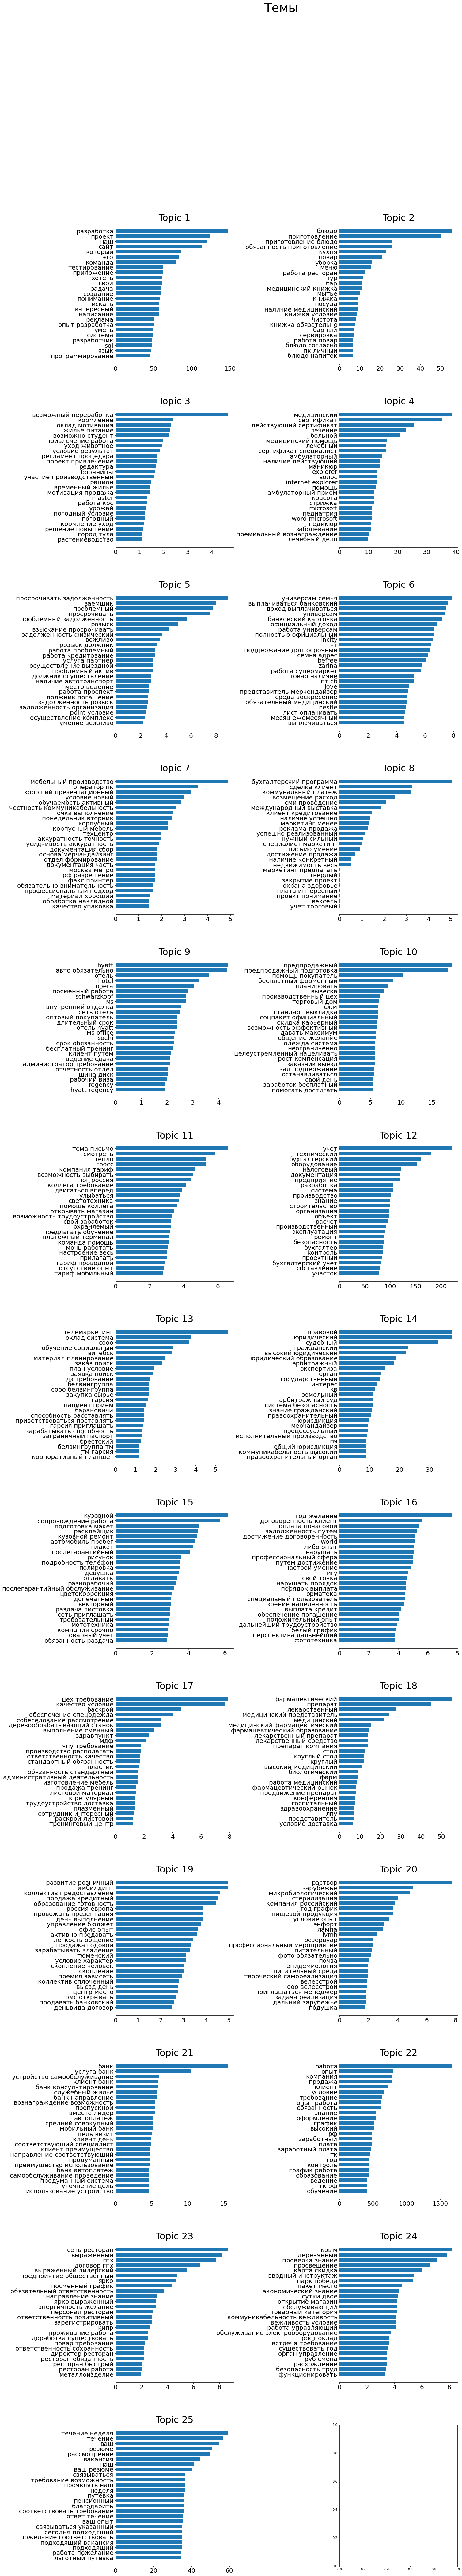

In [12]:
import matplotlib.pyplot as plt
def plot_top_words(model, feature_names, n_top_words, n_components, title):
    fig, axes = plt.subplots(n_components // 2 + 1, 2, figsize=(20, n_top_words * 5))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(lda, tfidf_vectorizer.get_feature_names(), N_TOP_WORDS, N_COMPONENTS, "Темы")

Пробуем проинтерпретировать получившиеся темы:

1. Программист
2. Повар
3. Уход за растениями и животными
4. Врач, парикмахер или работник салона красоты
5. Коллектор
6. Мерчендайзер
7. Сборщик мебели
8. Не удалось выделить тему
9. Отели, гостиницы и командировки
10. Не удалось выделить тему
11. Не удалось выделить тему
12. Бухгалтер
13. Работа в БелВинГруппе
14. Работа, связанная с охраной прав и свобод
15. Расклейщик объявлений и автомеханик
16. Не удалось выделить тему
17. Изготовитель мебели
18. Фармацевт
19. Работа, связанная с договорами и банком
20. Лаборант пищевого производства
21. Банковский консультант
22. Типовые слова в вакансии
23. Директор ресторана
24. Не удалось выделить тему
25. Иные типовые слова в вакансии

In [242]:
garbage_topics = [10, 11, 16, 22, 24, 25]

## 3. Рассмотреть распределение категорий вакансий по темам.

In [13]:
import json

def str_to_json(string):
    string = string.replace("'", '"')
    string = string.replace('True', 'true')
    string = string.replace('False', 'false')
    string = string.replace('None', 'null')
    try:
        return json.loads(string)
    except json.JSONDecodeError as e:
        return None

In [243]:
%%time
import pandas as pd

df = pd.read_csv('../data/vacancies_1.csv', sep='|', encoding='UTF-8')
vacancies_json = df['raw_json']
vacancies_json = vacancies_json.apply(str_to_json).dropna()
vacancies_json.head()

Wall time: 18.8 s


0    {'id': '13000000', 'premium': False, 'billing_...
1    {'id': '13000001', 'premium': False, 'billing_...
2    {'id': '13000002', 'premium': False, 'billing_...
3    {'id': '13000004', 'premium': False, 'billing_...
4    {'id': '13000008', 'premium': False, 'billing_...
Name: raw_json, dtype: object

In [244]:
vacancies_specializations = vacancies_json.apply(lambda el: el['specializations'])
vacancies_specializations.columns = ['specializations']
vacancies_specializations.head()

0    [{'id': '17.242', 'name': 'Прямые продажи', 'p...
1    [{'id': '8.462', 'name': 'Взыскание задолженно...
2    [{'id': '18.81', 'name': 'Инженер', 'profarea_...
3    [{'id': '3.507', 'name': 'Тайный покупатель', ...
4    [{'id': '20.396', 'name': 'Эксплуатация', 'pro...
Name: raw_json, dtype: object

In [245]:
vacancies_specialization = vacancies_specializations[vacancies_specializations.apply(lambda el: len(el)) == 1]
vacancies_specialization.columns = ['specialization']
vacancies_specialization.head()

8     [{'id': '1.221', 'name': 'Программирование, Ра...
16    [{'id': '3.148', 'name': 'Менеджер по работе с...
19    [{'id': '3.64', 'name': 'Дизайнер', 'profarea_...
20    [{'id': '4.429', 'name': 'Делопроизводство', '...
25    [{'id': '4.205', 'name': 'Персональный ассисте...
Name: raw_json, dtype: object

In [246]:
vacancies_specialization = vacancies_specialization.apply(lambda el: el[0]['profarea_name'])
vacancies_specialization.head()

8     Информационные технологии, интернет, телеком
16                          Маркетинг, реклама, PR
19                          Маркетинг, реклама, PR
20                       Административный персонал
25                       Административный персонал
Name: raw_json, dtype: object

In [247]:
vacancies_specialization.shape, vacancies_specializations.shape

((7084,), (36640,))

In [248]:
%%time
doc_topic_matrix = lda.transform(doc_term_matrix)
doc_topic_matrix[:5]

Wall time: 9.43 s


array([[0.00638858, 0.00638858, 0.00638858, 0.00638858, 0.00638858,
        0.00638858, 0.00638858, 0.00638858, 0.00638858, 0.00638858,
        0.00638858, 0.00638858, 0.00638858, 0.00638858, 0.00638858,
        0.00638858, 0.141758  , 0.00638858, 0.00638858, 0.00638858,
        0.00638858, 0.71130471, 0.00638858, 0.00638858, 0.00638858],
       [0.03674571, 0.00440971, 0.00440971, 0.00440971, 0.02449705,
        0.00440971, 0.00440971, 0.00440971, 0.00440971, 0.00440971,
        0.00440971, 0.05503199, 0.00440971, 0.03226388, 0.00440971,
        0.00440971, 0.00440971, 0.00440971, 0.00440971, 0.00440971,
        0.00440971, 0.51718125, 0.00440971, 0.2504957 , 0.00440971],
       [0.01611647, 0.00275854, 0.00275854, 0.0077176 , 0.00275854,
        0.00706252, 0.00275854, 0.00275854, 0.00275854, 0.00275854,
        0.00275854, 0.39027969, 0.00275854, 0.00275854, 0.00275854,
        0.00275854, 0.00275854, 0.00275854, 0.00275854, 0.00275854,
        0.00275854, 0.32139402, 0.00275854, 0.

In [249]:
doc_topic = pd.Series(np.argmax(doc_topic_matrix, axis=1) + 1, name='topic')
doc_topic

0        22
1        22
2        12
3        22
4        22
         ..
37775    22
37776    22
37777    22
37778    22
37779    22
Name: topic, Length: 37780, dtype: int64

In [250]:
mask = np.array([False] * doc_topic.shape[0]).reshape(doc_topic.shape)
for topic in garbage_topics:
    mask = np.logical_or(doc_topic == topic, mask)

doc_topic = doc_topic[~mask].dropna()
doc_topic.head(), doc_topic.shape

(2     12
 6      4
 18    12
 23     4
 40     1
 Name: topic, dtype: int64,
 (2624,))

In [251]:
index_without_garbage_topics = vacancies_specialization.index.intersection(doc_topic.index)
vacancies_specialization = vacancies_specialization[index_without_garbage_topics]
vacancies_specialization.head()

40                                          Продажи
58                        Банки, инвестиции, лизинг
89     Информационные технологии, интернет, телеком
115                                         Продажи
194                    Туризм, гостиницы, рестораны
Name: raw_json, dtype: object

In [252]:
doc_topic = doc_topic[index_without_garbage_topics]
doc_topic

40        1
58        4
89        1
115      12
194       4
         ..
37052     1
37176    12
37229     1
37396    12
37625     1
Name: topic, Length: 587, dtype: int64

In [255]:
doc_topic = doc_topic.replace(1, 'Программист')
doc_topic = doc_topic.replace(2, 'Повар')
doc_topic = doc_topic.replace(3, 'Уход за растениями и животными')
doc_topic = doc_topic.replace(4, 'Врач, парикмахер или работник салона красоты')
doc_topic = doc_topic.replace(5, 'Коллектор')
doc_topic = doc_topic.replace(6, 'Мерчендайзер')
doc_topic = doc_topic.replace(7, 'Сборщик мебели')
doc_topic = doc_topic.replace(9, 'Отели, гостиницы и командировки')
doc_topic = doc_topic.replace(12, 'Бухгалтер')
doc_topic = doc_topic.replace(13, 'Работа в БелВинГруппе')
doc_topic = doc_topic.replace(14, 'Работа, связанная с охраной прав и свобод')
doc_topic = doc_topic.replace(15, 'Расклейщик объявлений и автомеханик')
doc_topic = doc_topic.replace(16, 'Не удалось выделить тему')
doc_topic = doc_topic.replace(17, 'Изготовитель мебели')
doc_topic = doc_topic.replace(18, 'Фармацевт')
doc_topic = doc_topic.replace(19, 'Работа, связанная с договорами и банком')
doc_topic = doc_topic.replace(20, 'Лаборант пищевого производства')
doc_topic = doc_topic.replace(21, 'Банковский консультант')
doc_topic = doc_topic.replace(23, 'Директор ресторана')
doc_topic.head()

40                                      Программист
58     Врач, парикмахер или работник салона красоты
89                                      Программист
115                                       Бухгалтер
194    Врач, парикмахер или работник салона красоты
Name: topic, dtype: object

In [256]:
doc_topic.unique()

array(['Программист', 'Врач, парикмахер или работник салона красоты',
       'Бухгалтер', 'Повар', 'Банковский консультант',
       'Расклейщик объявлений и автомеханик',
       'Отели, гостиницы и командировки', 'Мерчендайзер',
       'Работа, связанная с охраной прав и свобод',
       'Лаборант пищевого производства'], dtype=object)

In [254]:
specialization_and_topic = pd.concat([vacancies_specialization, doc_topic], axis=1)
specialization_and_topic.columns = ['specialization', 'topic']
specialization_and_topic

specialization  \
40                                          Продажи   
58                        Банки, инвестиции, лизинг   
89     Информационные технологии, интернет, телеком   
115                                         Продажи   
194                    Туризм, гостиницы, рестораны   
...                                             ...   
37052                     Административный персонал   
37176                   Строительство, недвижимость   
37229  Информационные технологии, интернет, телеком   
37396                   Строительство, недвижимость   
37625  Информационные технологии, интернет, телеком   

                                              topic  
40                                      Программист  
58     Врач, парикмахер или работник салона красоты  
89                                      Программист  
115                                       Бухгалтер  
194    Врач, парикмахер или работник салона красоты  
...                                             ...  
37052                                   Программист  
37176                                     Бухгалтер  
37229                                   Программист  
37396                                     Бухгалтер  
37625                                   Программист  

[587 rows x 2 columns]

In [261]:
from scipy.stats import mode
agg_func_text = {'specialization': ['nunique', mode, set]}
specialization_and_topic.groupby(['topic']).agg(agg_func_text)

specialization  \
                                                    nunique   
topic                                                         
Банковский консультант                                    2   
Бухгалтер                                                20   
Врач, парикмахер или работник салона красоты              4   
Лаборант пищевого производства                            1   
Мерчендайзер                                              1   
Отели, гостиницы и командировки                           2   
Повар                                                     1   
Программист                                              15   
Работа, связанная с охраной прав и свобод                 4   
Расклейщик объявлений и автомеханик                       1   

                                                                                                 \
                                                                                           mode   
topic                                                                                             
Банковский консультант                                       ([Банки, инвестиции, лизинг], [2])   
Бухгалтер                                            ([Производство, сельское хозяйство], [80])   
Врач, парикмахер или работник салона красоты                   ([Медицина, фармацевтика], [50])   
Лаборант пищевого производства                ([Бухгалтерия, управленческий учет, финансы пр...   
Мерчендайзер                                                                   ([Продажи], [1])   
Отели, гостиницы и командировки                                       ([Рабочий персонал], [1])   
Повар                                                     ([Туризм, гостиницы, рестораны], [1])   
Программист                                   ([Информационные технологии, интернет, телеком...   
Работа, связанная с охраной прав и свобод                            ([Высший менеджмент], [2])   
Расклейщик объявлений и автомеханик                             ([Маркетинг, реклама, PR], [1])   

                                                                                                 
                                                                                            set  
topic                                                                                            
Банковский консультант                        {Информационные технологии, интернет, телеком,...  
Бухгалтер                                     {Медицина, фармацевтика, Закупки, Транспорт, л...  
Врач, парикмахер или работник салона красоты  {Туризм, гостиницы, рестораны, Медицина, фарма...  
Лаборант пищевого производства                {Бухгалтерия, управленческий учет, финансы пре...  
Мерчендайзер                                                                          {Продажи}  
Отели, гостиницы и командировки                {Туризм, гостиницы, рестораны, Рабочий персонал}  
Повар                                                            {Туризм, гостиницы, рестораны}  
Программист                                   {Автомобильный бизнес, Управление персоналом, ...  
Работа, связанная с охраной прав и свобод     {Маркетинг, реклама, PR, Управление персоналом...  
Расклейщик объявлений и автомеханик                                    {Маркетинг, реклама, PR}

## 4. Найти в [gensim](https://radimrehurek.com/gensim/) аналоги использованных методов. Сравнить результаты работы с sklearn.

### Подготовка

In [17]:
from gensim.matutils import Sparse2Corpus
doc_term_corpus =  Sparse2Corpus(doc_term_matrix)

### LSA (aka SVD)

In [18]:
%%time
from gensim.models import LsiModel
svd_gensim = LsiModel(corpus=doc_term_corpus, num_topics=N_COMPONENTS)

Wall time: 35.5 s


In [20]:
print_most_popular_words_from_topics(N_TOP_WORDS, svd_gensim.get_topics())

Top 25 words for topics:
Topic №1:
['доброжелательность обязанность', 'бонусировать', 'диалог клиент', 'день дополнительный', 'лицо формирование', 'время выходить', 'месяц выплата', 'конкурс корпоративный', 'знание состав', 'европейский программа', 'кредит первичный', 'денежный расчет', 'знание весь', 'вредитель', 'месяц расти', 'комплектование наполнение', 'весь торговый', 'автомобильный шина', 'законодательство реклама', 'красота обязанность', 'задание доработка', 'анализ проведение', 'контракт оформление', 'компрессорный установка', 'английский грамотный']
Topic №2:
['вопрос закупка', 'любимый', 'знание усна', 'альянс объединять', 'год молодой', 'день хотеть', 'въезд', 'весь вышеперечисленный', 'весь участник', 'агентство найм', 'контроль счет', 'заказчик весь', 'использовать различный', 'зритель', 'исследовать', 'office активный', 'комплектование наполнение', 'внесение данный', 'анализ соответствие', 'компьютер безлимитный', 'комплекс островок', 'год менеджер', 'меньший категория',

### NMF

In [21]:
%%time
from gensim.models import Nmf

nmf_gensim = Nmf(corpus=doc_term_corpus, num_topics=N_COMPONENTS)

Wall time: 49.8 s


In [23]:
print_most_popular_words_from_topics(N_TOP_WORDS, nmf_gensim.get_topics())

Top 25 words for topics:
Topic №1:
['демократический стиль', 'долговременный отношение', 'ajax', 'лицо умение', 'дружный высокопрофессиональный', 'индивидуально зависимость', 'клиент зона', 'месяц карьерный', 'adriver', 'клиентоориентированность ориентация', 'готовый принимать', 'зачисляться кадровый', 'контакт роспотребнадзор', 'км новый', 'значительный изменение', 'дневной время', 'значение иметь', 'документ срок', 'арт', 'грамотно распределять', 'горячий обед', 'договор продажа', 'вика', 'взвешивание хранение', 'deadline']
Topic №2:
['исторический', 'бухгалтер требование', 'выполнение медицинский', 'задолженность юридический', 'мерчендайзинг соблюдение', 'история', 'компания ао', 'исторический центр', 'исторический часть', 'кредитный отдел', 'задача каждый', 'день молодой', 'лига закон', 'билет полный', 'paragon', 'бухгалтер приветствоваться', 'коммуникация представитель', 'водитель зарабатывать', 'место проживание', 'исправный', 'вернадский мина', 'комплектующий материал', 'желател

### LDA

In [24]:
%%time
from gensim.models import LdaModel

lda_gensim = LdaModel(corpus=doc_term_corpus, num_topics=N_COMPONENTS)

Wall time: 31.8 s


In [28]:
print_most_popular_words_from_topics(N_TOP_WORDS, lda_gensim.get_topics())

Top 25 words for topics:
Topic №1:
['интересный игровой', 'достижение который', 'менеджер персонал', 'альпы', 'дмс система', 'компания ночной', 'звонок поддержка', 'день соответствие', 'внимательность отличный', 'действующий контракт', 'государственный образец', 'магазин карусель', 'государственный', 'лот', 'лист тд', 'листовой металл', 'клиент составление', 'культура предоставляться', 'менеджер недвижимость', 'выполнение прочий', 'метод проектный', 'маркетинговый поддержка', 'крайне желательно', 'кропотливый работа', 'закон']
Topic №2:
['карьерный весь', 'вознаграждение премия', 'международный промышленный', 'вкусный завтрак', 'apple', 'активность высокий', 'инкассация консультирование', 'командировка активный', 'весь выплата', 'команда продавец', 'команда интересный', 'команда лидер', 'group лидировать', 'google analytics', 'машинопись', 'ежедневный сверка', 'illustrator indesign', 'дмс социальный', 'hr', 'ielts', 'внедрение продукт', 'документация инструкция', 'матрица своевременный

Хоть и алгоритмы из __gensim__ обучаются заметно быстрее, в особенности алгоритм _lda_, но результат работы несколько хуже.